In [1]:
#Loading libraries 
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
import keras
import theano
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0)
import seaborn as sns
from scipy import stats
from scipy.stats import norm
import numpy as np 
import pandas as pd
from sklearn.linear_model import LogisticRegression

Using Theano backend.
WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
C:\Users\kumara213\AppData\Local\Continuum\anaconda2\envs\py35\lib\site-packages\theano\configdefaults.py:560: UserWarning: DeprecationWarning: there is no c++ compiler.This is deprecated and with Theano 0.11 a c++ compiler will be mandatory
  warnings.warn("DeprecationWarning: there is no c++ compiler."
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.configdefaults): install mkl with `conda install mkl-service`: No module named 'mkl'
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
#Reading all the dataset
train=pd.read_excel('./datasetfile 1.xlsm')
train.head()

,Pat_ID,Flare_Up,Demo1,Demo2,Demo3,Demo4,Demo5,Demo6,DisHis1,DisHis1Times,...,Dis7,RespQues1,ResQues1a,ResQues1b,ResQues1c,ResQues2a,SmokHis1,SmokHis2,SmokHis3,SmokHis4
0,1,0,1,0.246004,0.391931,0.237792,0,0.443526,0,0.000000,...,0,0.126230,0.1032,0.2439,0.0597,0.0,0.411765,0.263620,0.482759,0.1875
1,2,1,1,0.225851,0.268012,0.268481,0,0.286501,0,0.000000,...,0,0.607070,0.3808,0.8637,0.4949,0.1,0.117647,0.098418,0.624138,0.0000
2,3,0,0,0.342599,0.476945,0.296468,1,0.159780,1,0.166667,...,0,0.775410,0.6318,1.0000,0.6570,0.3,0.035294,0.020211,0.510345,0.0000
3,4,0,1,0.246699,0.347262,0.256707,0,0.424242,0,0.000000,...,1,0.298258,0.6181,0.4178,0.1164,0.4,0.176471,0.132689,0.572414,0.0000
4,5,1,0,0.270327,0.449568,0.239143,0,0.641873,1,0.250000,...,0,0.642008,0.7250,0.8587,0.4634,0.5,0.411765,0.378735,0.708621,0.0000


In [3]:
test=pd.read_excel('./Scoring dataset.xlsm')
test.head()

,Pat_ID,Demo1,Demo2,Demo3,Demo4,Demo5,Demo6,DisHis1,DisHis1Times,DisHis2,...,Dis7,RespQues1,ResQues1a,ResQues1b,ResQues1c,ResQues2a,SmokHis1,SmokHis2,SmokHis3,SmokHis4
0,6,0,0.430160,0.596542,0.323297,0,0.867769,0,0.0,0,...,0,0.273566,0.1074,0.7282,0.0469,0.3,0.082353,0.085237,0.724138,0.145833
1,9,0,0.218902,0.484150,0.177958,0,0.225895,0,0.0,0,...,0,0.456557,0.1791,0.7896,0.3212,0.2,0.176471,0.144991,0.620690,0.000000
2,15,0,0.628909,0.433718,0.594094,1,0.363636,0,0.0,0,...,0,0.396414,0.2596,0.8032,0.1836,0.2,0.058824,0.052724,0.637931,0.062500
3,25,1,0.236275,0.268012,0.280255,0,0.388430,0,0.0,0,...,0,0.000000,0.0000,0.0000,0.0000,0.1,0.176471,0.118629,0.517241,0.104167
4,27,1,0.397498,0.327089,0.425787,0,0.063361,0,0.0,0,...,0,0.058709,0.0000,0.1847,0.0000,0.0,0.176471,0.087873,0.396552,0.062500


In [4]:
data3=pd.read_excel('./datasetfile3.xlsm.xlsx')
data3.head()

,Variable Name,Category,Type,Linked
0,PAT_ID,Identifier,NaN,NaN
1,Flare_Up,Group,Binary,
2,Demo1,Demographics,Binary,
3,Demo2,Demographics,Continuous,
4,Demo3,Demographics,Continuous,


In [5]:
train.describe()

,Pat_ID,Flare_Up,Demo1,Demo2,Demo3,Demo4,Demo5,Demo6,DisHis1,DisHis1Times,...,Dis7,RespQues1,ResQues1a,ResQues1b,ResQues1c,ResQues2a,SmokHis1,SmokHis2,SmokHis3,SmokHis4
count,1687.000000,1687.000000,1687.000000,1687.000000,1687.000000,1687.000000,1687.000000,1687.000000,1687.000000,1687.000000,...,1687.000000,1687.000000,1687.000000,1687.000000,1687.000000,1687.000000,1687.000000,1687.000000,1687.000000,1687.000000
mean,991.147007,0.129816,0.472436,0.359300,0.444076,0.325831,0.241849,0.491118,0.176052,0.026181,...,0.225845,0.356452,0.392801,0.501883,0.246523,0.226319,0.242463,0.174729,0.551153,0.144067
std,573.637421,0.336201,0.499388,0.141685,0.137103,0.125716,0.428331,0.241088,0.380977,0.077001,...,0.418261,0.223072,0.253647,0.284805,0.204867,0.200254,0.143170,0.119613,0.168780,0.197351
min,1.000000,0.000000,0.000000,0.000000,0.053314,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,498.500000,0.000000,0.000000,0.260598,0.341499,0.238854,0.000000,0.308540,0.000000,0.000000,...,0.000000,0.173412,0.179100,0.293100,0.072300,0.000000,0.176471,0.097100,0.450000,0.000000
50%,984.000000,0.000000,0.000000,0.343989,0.448127,0.310944,0.000000,0.501377,0.000000,0.000000,...,0.000000,0.344160,0.380800,0.536200,0.210300,0.200000,0.176471,0.149385,0.568966,0.041667
75%,1488.500000,0.000000,1.000000,0.442669,0.541787,0.392588,0.000000,0.674931,0.000000,0.000000,...,0.000000,0.525154,0.587900,0.728200,0.381200,0.400000,0.294118,0.226274,0.662069,0.229167
max,1985.000000,1.000000,1.000000,0.879083,0.853026,1.000000,1.000000,0.997245,1.000000,1.000000,...,1.000000,0.961168,1.000000,1.000000,0.918200,1.000000,1.000000,1.000000,0.972414,0.937500


In [6]:
print ('The train data has {0} rows and {1} columns'.format(train.shape[0],train.shape[1]))
print ('----------------------------')
print ('The test data has {0} rows and {1} columns'.format(test.shape[0],test.shape[1]))

The train data has 1687 rows and 62 columns
----------------------------
The test data has 298 rows and 61 columns


In [7]:
x=train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1687 entries, 0 to 1686
Data columns (total 62 columns):
Pat_ID          1687 non-null int64
Flare_Up        1687 non-null int64
Demo1           1687 non-null int64
Demo2           1687 non-null float64
Demo3           1687 non-null float64
Demo4           1687 non-null float64
Demo5           1687 non-null int64
Demo6           1687 non-null float64
DisHis1         1687 non-null int64
DisHis1Times    1687 non-null float64
DisHis2         1687 non-null int64
DisHis2Times    1687 non-null float64
DisHis3         1687 non-null int64
DisHis3Times    1687 non-null float64
DisHis4         1687 non-null int64
DisHis5         1687 non-null int64
DisHis6         1687 non-null float64
DisHis7         1687 non-null int64
DisStage1       1687 non-null float64
DisStage2       1687 non-null float64
LungFun1        1687 non-null float64
LungFun2        1687 non-null float64
LungFun3        1687 non-null float64
LungFun4        1687 non-null float64
L

In [8]:
#missing value counts in each of these columns
miss = train.isnull().sum()/len(train)
miss = miss[miss > 0]
miss.sort_values(inplace=True)
miss

Series([], dtype: float64)

# That means data-set has no missing value

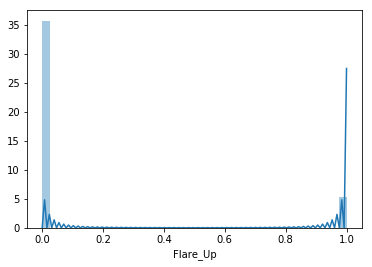

In [9]:
#checking the skewness of the target variable
sns.distplot(train['Flare_Up'])

In [10]:
print ("The skewness of SalePrice is {}".format(train['Flare_Up'].skew()))

The skewness of SalePrice is 2.204772454636255


In [11]:
#separate variables into new data frames
numeric_data = train.select_dtypes(include=[np.number])
cat_data = train.select_dtypes(exclude=[np.number])
print ("There are {} numeric and {} categorical columns in train data".format(numeric_data.shape[1],cat_data.shape[1]))

There are 62 numeric and 0 categorical columns in train data


In [12]:
#removing the Id variable from numeric data
del numeric_data['Pat_ID']

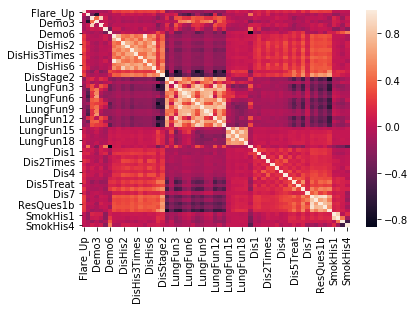

In [13]:
#correlation plot
corr = numeric_data.corr()
sns.heatmap(corr)

In [14]:
#We can see the correlation of all variables against Flare_Up
print (corr['Flare_Up'].sort_values(ascending=False)[:15], '\n') #top 15 values
print ('----------------------')
print (corr['Flare_Up'].sort_values(ascending=False)[-5:]) #last 5 values

Flare_Up        1.000000
DisHis3         0.292855
DisStage2       0.276271
DisHis2         0.264323
DisHis7         0.263170
DisHis4         0.261955
DisHis6         0.259662
ResQues1a       0.258288
RespQues1       0.255431
DisHis2Times    0.248768
ResQues1c       0.239256
DisHis5         0.238223
DisHis1         0.238223
ResQues2a       0.220562
ResQues1b       0.217019
Name: Flare_Up, dtype: float64 

----------------------
LungFun3    -0.181229
LungFun4    -0.187634
LungFun12   -0.199298
LungFun1    -0.200903
LungFun9    -0.203726
Name: Flare_Up, dtype: float64


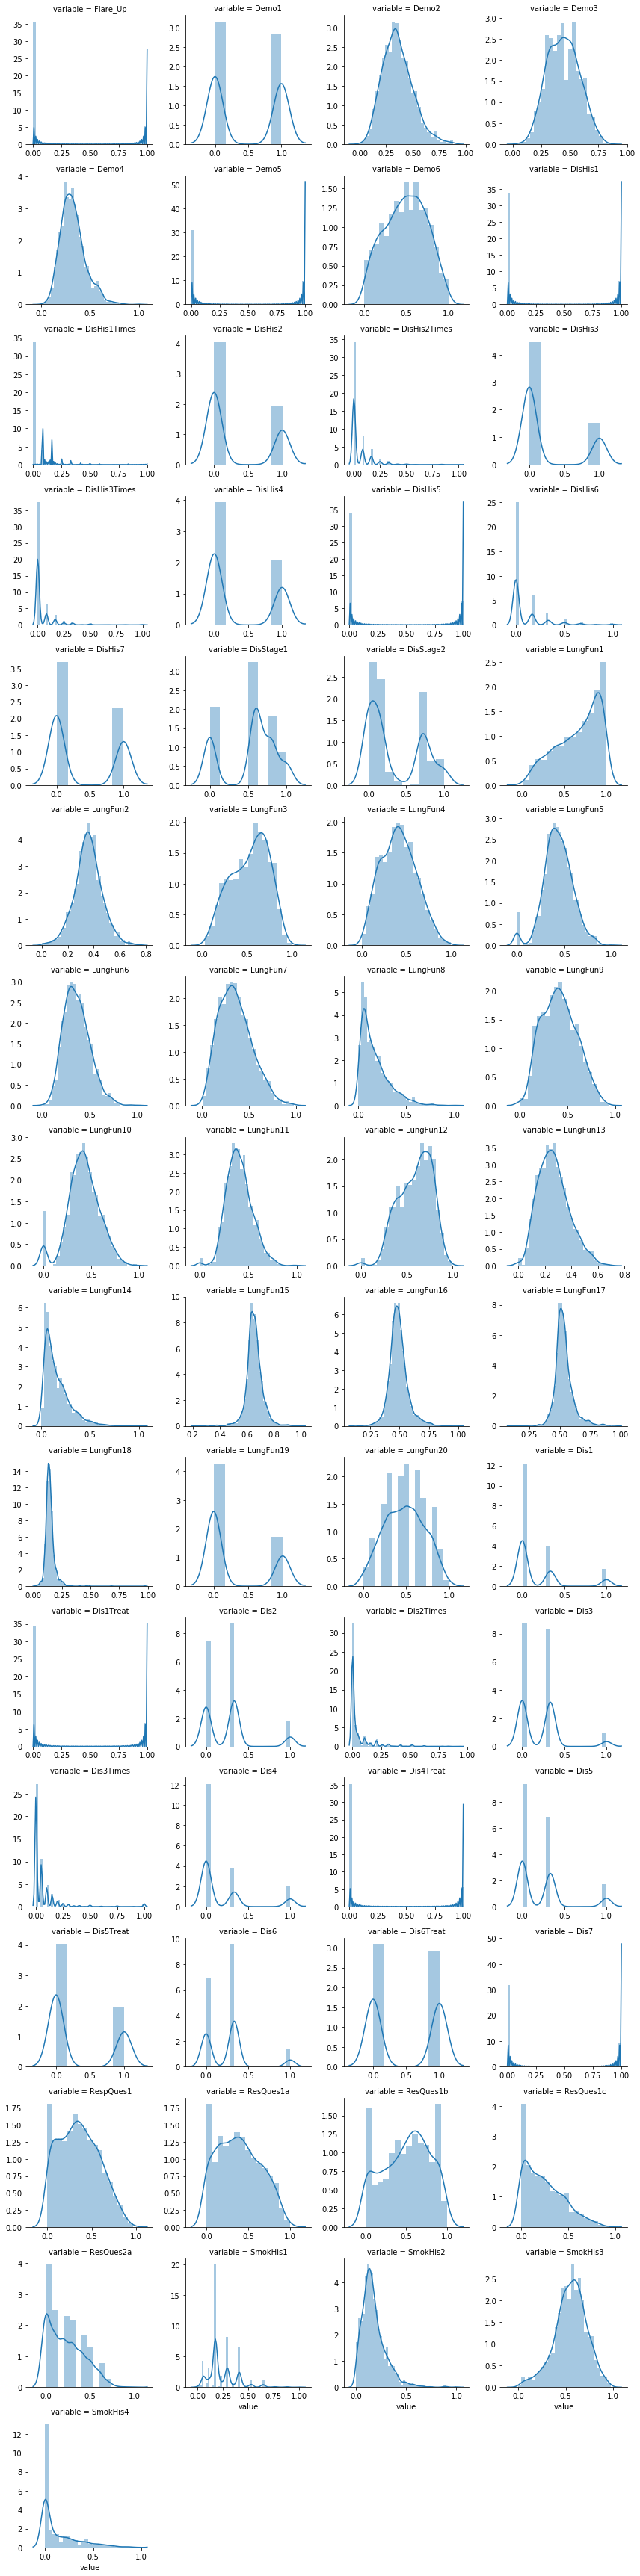

In [15]:
#create numeric plots for checking the correlation
num = [f for f in train.columns if train.dtypes[f] != 'object']
num.remove('Pat_ID')
nd = pd.melt(train, value_vars = num)
n1 = sns.FacetGrid (nd, col='variable', col_wrap=4, sharex=False, sharey = False)
n1 = n1.map(sns.distplot, 'value')
n1

In [16]:
featured_column = [f for f in train.columns if train.dtypes[f] != 'object']
featured_column.remove('Pat_ID')
featured_column.remove('Flare_Up')
x=train[featured_column]#We will take only this columns to decide whther the person is diabetic or not
y=train['Flare_Up']#This will be the final answer

In [17]:
featured_column[58]

'SmokHis3'

In [18]:
x.head()

,Demo1,Demo2,Demo3,Demo4,Demo5,Demo6,DisHis1,DisHis1Times,DisHis2,DisHis2Times,...,Dis7,RespQues1,ResQues1a,ResQues1b,ResQues1c,ResQues2a,SmokHis1,SmokHis2,SmokHis3,SmokHis4
0,1,0.246004,0.391931,0.237792,0,0.443526,0,0.000000,0,0.000000,...,0,0.126230,0.1032,0.2439,0.0597,0.0,0.411765,0.263620,0.482759,0.1875
1,1,0.225851,0.268012,0.268481,0,0.286501,0,0.000000,1,0.333333,...,0,0.607070,0.3808,0.8637,0.4949,0.1,0.117647,0.098418,0.624138,0.0000
2,0,0.342599,0.476945,0.296468,1,0.159780,1,0.166667,1,0.833333,...,0,0.775410,0.6318,1.0000,0.6570,0.3,0.035294,0.020211,0.510345,0.0000
3,1,0.246699,0.347262,0.256707,0,0.424242,0,0.000000,0,0.000000,...,1,0.298258,0.6181,0.4178,0.1164,0.4,0.176471,0.132689,0.572414,0.0000
4,0,0.270327,0.449568,0.239143,0,0.641873,1,0.250000,1,0.166667,...,0,0.642008,0.7250,0.8587,0.4634,0.5,0.411765,0.378735,0.708621,0.0000


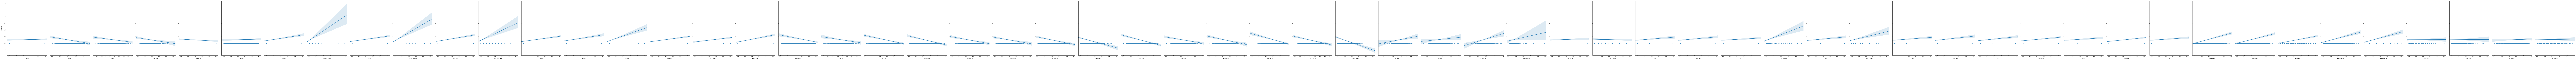

In [19]:
sns.pairplot(train, x_vars=featured_column, y_vars='Flare_Up', size=7, aspect=0.7, kind='reg')

In [20]:
class_counts = train.groupby('Flare_Up').size()
print(class_counts)

Flare_Up
0    1468
1     219
dtype: int64


# FEATURE SELECTION

In [21]:
# Feature Extraction with Univariate Statistical Tests (Chi-squared for classification)
from pandas import read_csv
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
# load data
X = train[featured_column]
Y = train['Flare_Up']
# feature extraction
test_feature = SelectKBest(score_func=chi2, k=12)#chi-squared (chi2) statistical test for non-negative features to select 4 of the bestfeatures from the Pima Indians onset of diabetes dataset.
fit = test_feature.fit(X, Y)
# summarize scores
set_printoptions(precision=3)
print(fit.scores_)
features = fit.transform(X)
# summarize selected features
print(features[0:12,:])

[1.746e+00 1.080e+00 5.562e-01 5.065e-01 1.144e+01 9.311e-02 7.888e+01
 1.660e+01 7.972e+01 2.227e+01 1.079e+02 2.210e+01 7.589e+01 7.888e+01
 4.031e+01 7.182e+01 9.815e+00 4.729e+01 6.786e+00 3.863e-01 4.507e+00
 5.408e+00 1.064e+00 7.941e-01 3.091e+00 5.192e+00 5.415e+00 1.395e+00
 9.270e-01 3.516e+00 1.950e+00 5.523e+00 3.310e-02 3.408e-02 2.076e-01
 4.643e-02 4.695e+00 5.962e-02 8.500e+00 2.417e+01 2.403e+00 1.432e+01
 3.882e+00 1.091e+01 8.634e+00 3.320e+01 9.596e+00 3.470e+01 2.277e+00
 3.764e+01 1.637e+01 1.536e+01 1.842e+01 1.283e+01 1.643e+01 1.453e+01
 2.731e-04 1.261e-03 2.954e-02 4.707e-02]
[[0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    1.   ]
 [0.    1.    1.    1.    0.    0.667 1.    0.857 1.    1.    1.    1.   ]
 [1.    1.    0.    0.    1.    0.    1.    0.143 0.    0.    0.    0.   ]
 [0.    0.    0.    0.    0.    0.    0.    0.714 1.    0.    0.    0.   ]
 [1.    1.    1.    1.    1.    0.5   1.    1.    0.    1.    0.    1.   ]
 [0.    0.    0

In [22]:
# Feature Extraction with RFE
from sklearn.feature_selection import RFE
X = train[featured_column]
Y = train['Flare_Up']
# feature extraction
model = LogisticRegression()
rfe = RFE(model, 12)
fit = rfe.fit(X, Y)
print("Num Features: ", fit.n_features_)
print("Selected Features:", fit.support_)
print("index of features ",[i for i, e in enumerate(fit.support_) if e == True])
print("Feature Ranking: ",fit.ranking_)

Num Features:  12
Selected Features: [False False  True  True  True False False False False  True  True False
 False False False False False False False False False False False False
  True False  True False  True  True False False False False False False
 False False False False False  True False False False False False False
 False False False False  True False False False  True False False False]
index of features  [2, 3, 4, 9, 10, 24, 26, 28, 29, 41, 52, 56]
Feature Ranking:  [48  3  1  1  1 14 22 35 15  1  1 12 28  5 44 25 19 26 42 39 29 49 34 11
  1 40  1 20  1  1 10  6 21  7  8 27 31 13 24 17 36  1 33  2 37 38 18 30
 16 23 45  9  1 46 47 41  1  4 32 43]


# FEATURE IMPORTANCE

In [23]:
# Feature Importance with Extra Trees Classifier
from pandas import read_csv
from sklearn.ensemble import ExtraTreesClassifier
X = train[featured_column]
Y = train['Flare_Up']
# feature extraction
model = ExtraTreesClassifier()
model.fit(X, Y)
print(model.feature_importances_)

[0.011 0.021 0.019 0.022 0.009 0.025 0.014 0.006 0.013 0.012 0.018 0.015
 0.019 0.012 0.017 0.016 0.011 0.027 0.018 0.018 0.019 0.021 0.015 0.012
 0.019 0.015 0.016 0.023 0.015 0.015 0.017 0.02  0.019 0.019 0.013 0.019
 0.013 0.019 0.014 0.014 0.012 0.024 0.014 0.02  0.015 0.01  0.013 0.013
 0.008 0.012 0.009 0.018 0.036 0.025 0.02  0.016 0.018 0.02  0.019 0.021]


In [24]:
featured_column=['Demo2','Demo3','Demo4','LungFun2','LungFun3','LungFun7','LungFun14','LungFun17','Dis2Times','RespQues1','ResQues1a','ResQues1b','ResQues1c']
x=train[featured_column]
y=train['Flare_Up']

In [25]:
#performing croos validation
from sklearn.cross_validation import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)

C:\Users\kumara213\AppData\Local\Continuum\anaconda2\envs\py35\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


# APPLYING LOGISTIC REGRESSION MODEL

In [26]:
#Testing on cross validated data
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [27]:
# Validating the data by predicting on test splitted data
y_pred_class = logreg.predict(x_test)

In [28]:
y_pred_class

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [29]:
# calculate accuracy on validation data
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred_class))

0.8720379146919431


In [30]:
test.head()

,Pat_ID,Demo1,Demo2,Demo3,Demo4,Demo5,Demo6,DisHis1,DisHis1Times,DisHis2,...,Dis7,RespQues1,ResQues1a,ResQues1b,ResQues1c,ResQues2a,SmokHis1,SmokHis2,SmokHis3,SmokHis4
0,6,0,0.430160,0.596542,0.323297,0,0.867769,0,0.0,0,...,0,0.273566,0.1074,0.7282,0.0469,0.3,0.082353,0.085237,0.724138,0.145833
1,9,0,0.218902,0.484150,0.177958,0,0.225895,0,0.0,0,...,0,0.456557,0.1791,0.7896,0.3212,0.2,0.176471,0.144991,0.620690,0.000000
2,15,0,0.628909,0.433718,0.594094,1,0.363636,0,0.0,0,...,0,0.396414,0.2596,0.8032,0.1836,0.2,0.058824,0.052724,0.637931,0.062500
3,25,1,0.236275,0.268012,0.280255,0,0.388430,0,0.0,0,...,0,0.000000,0.0000,0.0000,0.0000,0.1,0.176471,0.118629,0.517241,0.104167
4,27,1,0.397498,0.327089,0.425787,0,0.063361,0,0.0,0,...,0,0.058709,0.0000,0.1847,0.0000,0.0,0.176471,0.087873,0.396552,0.062500


In [31]:
test.shape

(298, 61)

In [32]:
testx=test[featured_column]

In [33]:
#predicting on the real test data
test_y = logreg.predict(testx)

In [34]:
test_y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=i

In [35]:
#adding predicted value column to end of test data set
test['actual_predicted_value']=test_y
test.head()

,Pat_ID,Demo1,Demo2,Demo3,Demo4,Demo5,Demo6,DisHis1,DisHis1Times,DisHis2,...,RespQues1,ResQues1a,ResQues1b,ResQues1c,ResQues2a,SmokHis1,SmokHis2,SmokHis3,SmokHis4,actual_predicted_value
0,6,0,0.430160,0.596542,0.323297,0,0.867769,0,0.0,0,...,0.273566,0.1074,0.7282,0.0469,0.3,0.082353,0.085237,0.724138,0.145833,0
1,9,0,0.218902,0.484150,0.177958,0,0.225895,0,0.0,0,...,0.456557,0.1791,0.7896,0.3212,0.2,0.176471,0.144991,0.620690,0.000000,0
2,15,0,0.628909,0.433718,0.594094,1,0.363636,0,0.0,0,...,0.396414,0.2596,0.8032,0.1836,0.2,0.058824,0.052724,0.637931,0.062500,0
3,25,1,0.236275,0.268012,0.280255,0,0.388430,0,0.0,0,...,0.000000,0.0000,0.0000,0.0000,0.1,0.176471,0.118629,0.517241,0.104167,0
4,27,1,0.397498,0.327089,0.425787,0,0.063361,0,0.0,0,...,0.058709,0.0000,0.1847,0.0000,0.0,0.176471,0.087873,0.396552,0.062500,0


# FINDING TRUE POSITIVE ,TRUE NEGATIVES,ROC ,AUC CURVE

In [36]:
trueInput=train.ix[train['Flare_Up']==1][featured_column]
trueOutput=train.ix[train['Flare_Up']==1]['Flare_Up']
##True positive rate
np.mean(logreg.predict(trueInput)==trueOutput)

C:\Users\kumara213\AppData\Local\Continuum\anaconda2\envs\py35\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


0.0365296803652968

In [37]:
##True negative
falseInput=train.ix[train['Flare_Up']==0][featured_column]
falseOutput=train.ix[train['Flare_Up']==0]['Flare_Up']
##True negative rate
np.mean(logreg.predict(falseInput)==falseOutput)

0.9952316076294278

In [38]:
###Confusion matrix with sklearn
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
confusion_matrix(logreg.predict(x),y)

array([[1461,  211],
       [   7,    8]], dtype=int64)

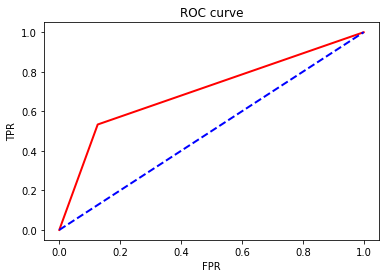

In [39]:
##Computing false and true positive rates
fpr, tpr,_=roc_curve(logreg.predict(x),y,drop_intermediate=False)

import matplotlib.pyplot as plt
plt.figure()
##Adding the ROC
plt.plot(fpr, tpr, color='red',
 lw=2, label='ROC curve')
##Random FPR and TPR
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
##Title and label
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

In [40]:
roc_auc_score(logreg.predict(x),y)

0.7035685805422647

# IMPROVING PERFORMANCE USING XGBOOST CLASSIFIER

In [41]:
# fit model no training data
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [42]:
#test on our cross validated data
cross_validate_test=model.predict(x_test)

C:\Users\kumara213\AppData\Local\Continuum\anaconda2\envs\py35\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [43]:
# calculate accuracy on validation data
from sklearn import metrics
print(metrics.accuracy_score(y_test, cross_validate_test))

0.8649289099526066


In [44]:
# make predictions for test data
y_pred = model.predict(testx)
predictions = [round(value) for value in y_pred]
y_pred

C:\Users\kumara213\AppData\Local\Continuum\anaconda2\envs\py35\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=i

In [45]:
y_pred.shape

(298,)

In [46]:
#Adding one more column to test data indicating the value of xgboost classifier result
test['xgboost_predicetd_value']=y_pred

In [47]:
test.head()

,Pat_ID,Demo1,Demo2,Demo3,Demo4,Demo5,Demo6,DisHis1,DisHis1Times,DisHis2,...,ResQues1a,ResQues1b,ResQues1c,ResQues2a,SmokHis1,SmokHis2,SmokHis3,SmokHis4,actual_predicted_value,xgboost_predicetd_value
0,6,0,0.430160,0.596542,0.323297,0,0.867769,0,0.0,0,...,0.1074,0.7282,0.0469,0.3,0.082353,0.085237,0.724138,0.145833,0,0
1,9,0,0.218902,0.484150,0.177958,0,0.225895,0,0.0,0,...,0.1791,0.7896,0.3212,0.2,0.176471,0.144991,0.620690,0.000000,0,0
2,15,0,0.628909,0.433718,0.594094,1,0.363636,0,0.0,0,...,0.2596,0.8032,0.1836,0.2,0.058824,0.052724,0.637931,0.062500,0,0
3,25,1,0.236275,0.268012,0.280255,0,0.388430,0,0.0,0,...,0.0000,0.0000,0.0000,0.1,0.176471,0.118629,0.517241,0.104167,0,0
4,27,1,0.397498,0.327089,0.425787,0,0.063361,0,0.0,0,...,0.0000,0.1847,0.0000,0.0,0.176471,0.087873,0.396552,0.062500,0,0


In [48]:
trueInput=train.ix[train['Flare_Up']==1][featured_column]
trueOutput=train.ix[train['Flare_Up']==1]['Flare_Up']
##True positive rate
np.mean(model.predict(trueInput)==trueOutput)

C:\Users\kumara213\AppData\Local\Continuum\anaconda2\envs\py35\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.2968036529680365

In [49]:
##True negative
falseInput=train.ix[train['Flare_Up']==0][featured_column]
falseOutput=train.ix[train['Flare_Up']==0]['Flare_Up']
##True negative rate
np.mean(model.predict(falseInput)==falseOutput)

C:\Users\kumara213\AppData\Local\Continuum\anaconda2\envs\py35\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.9945504087193461

In [50]:
###Confusion matrix with sklearn
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
confusion_matrix(model.predict(x),y)

C:\Users\kumara213\AppData\Local\Continuum\anaconda2\envs\py35\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


array([[1460,  154],
       [   8,   65]], dtype=int64)

C:\Users\kumara213\AppData\Local\Continuum\anaconda2\envs\py35\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Text(0.5,1,'RO')

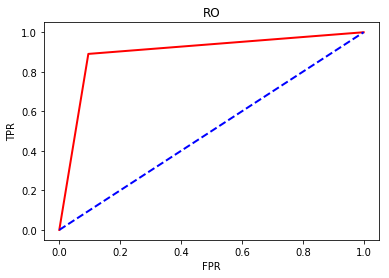

In [51]:
##Computing false and true positive rates
fpr, tpr,_=roc_curve(model.predict(x),y,drop_intermediate=False)

import matplotlib.pyplot as plt
plt.figure()
##Adding the ROC
plt.plot(fpr, tpr, color='red',
 lw=2, label='ROC curve')
##Random FPR and TPR
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
##Title and label
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('RO')

In [52]:
#calculating the roc_auc_score
roc_auc_score(model.predict(x),y)

C:\Users\kumara213\AppData\Local\Continuum\anaconda2\envs\py35\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.8974979205920796

# USING NEURAL NETWORK

In [53]:
import keras
import theano
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
import pandas as pd

np.random.seed(7)

In [54]:
#creating model
model=Sequential()
feature_length=len(featured_column)
model.add(Dense(12,input_dim=feature_length,activation='relu'))#This is input layer which takes 12 neurons and receives 8 inputs
model.add(Dense(8,activation='relu'))#The second hidden layer has 8 neurons
model.add(Dense(1,activation='sigmoid'))#the output layer has 1 neurons for prediction

In [55]:
## Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [56]:
# Fit the model
model.fit(x, y, epochs=25, batch_size=10)

Epoch 1/25
1687/1687 [==============================] - 9s 5ms/step - loss: 0.4744 - acc: 0.8583
Epoch 2/25
1687/1687 [==============================] - 7s 4ms/step - loss: 0.3708 - acc: 0.8702
Epoch 3/25
1687/1687 [==============================] - 6s 4ms/step - loss: 0.3515 - acc: 0.8702
Epoch 4/25
1687/1687 [==============================] - 7s 4ms/step - loss: 0.3423 - acc: 0.8702
Epoch 5/25
1687/1687 [==============================] - 7s 4ms/step - loss: 0.3391 - acc: 0.8708
Epoch 6/25
1687/1687 [==============================] - 9s 5ms/step - loss: 0.3362 - acc: 0.8708
Epoch 7/25
1687/1687 [==============================] - 8s 5ms/step - loss: 0.3349 - acc: 0.8690
Epoch 8/25
1687/1687 [==============================] - 8s 5ms/step - loss: 0.3346 - acc: 0.8708
Epoch 9/25
1687/1687 [==============================] - 10s 6ms/step - loss: 0.3337 - acc: 0.8714
Epoch 10/25
1687/1687 [==============================] - 10s 6ms/step - loss: 0.3330 - acc: 0.8702
Epoch 11/25
1687/1687 [====

In [57]:
predictions = model.predict(testx)
rounded = [int(round(x[0])) for x in predictions]
print(rounded)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [58]:
#adding predicted value column to end of test data set
test['deep_neural_ntwork_prediction']=test_y
test.head()

,Pat_ID,Demo1,Demo2,Demo3,Demo4,Demo5,Demo6,DisHis1,DisHis1Times,DisHis2,...,ResQues1b,ResQues1c,ResQues2a,SmokHis1,SmokHis2,SmokHis3,SmokHis4,actual_predicted_value,xgboost_predicetd_value,deep_neural_ntwork_prediction
0,6,0,0.430160,0.596542,0.323297,0,0.867769,0,0.0,0,...,0.7282,0.0469,0.3,0.082353,0.085237,0.724138,0.145833,0,0,0
1,9,0,0.218902,0.484150,0.177958,0,0.225895,0,0.0,0,...,0.7896,0.3212,0.2,0.176471,0.144991,0.620690,0.000000,0,0,0
2,15,0,0.628909,0.433718,0.594094,1,0.363636,0,0.0,0,...,0.8032,0.1836,0.2,0.058824,0.052724,0.637931,0.062500,0,0,0
3,25,1,0.236275,0.268012,0.280255,0,0.388430,0,0.0,0,...,0.0000,0.0000,0.1,0.176471,0.118629,0.517241,0.104167,0,0,0
4,27,1,0.397498,0.327089,0.425787,0,0.063361,0,0.0,0,...,0.1847,0.0000,0.0,0.176471,0.087873,0.396552,0.062500,0,0,0


In [59]:
trueInput=train.ix[train['Flare_Up']==1][featured_column]
trueOutput=train.ix[train['Flare_Up']==1]['Flare_Up']
##True positive rate
trueInputPrediction=model.predict(trueInput)
trueInputPredictionrounded = [int(round(x[0])) for x in trueInputPrediction]
np.mean(trueInputPredictionrounded==trueOutput)


##True negative
falseInput=train.ix[train['Flare_Up']==0][featured_column]
falseOutput=train.ix[train['Flare_Up']==0]['Flare_Up']
##True negative rate
falseInputPrediction=model.predict(falseInput)
falseInputPredictionrounded = [int(round(x[0])) for x in falseInputPrediction]
np.mean(falseInputPredictionrounded==falseOutput)

0.9938692098092643

In [60]:
test_cross_validated_data=model.predict(x)
test_cross_validated_datarounded = [int(round(x[0])) for x in test_cross_validated_data]

In [61]:
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
confusion_matrix(test_cross_validated_datarounded,y)

array([[1459,  207],
       [   9,   12]], dtype=int64)

Text(0.5,1,'RO')

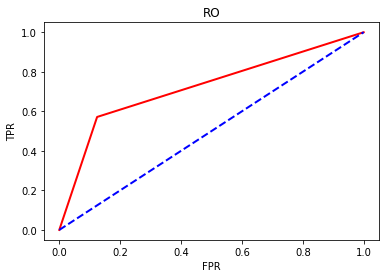

In [62]:
##Computing false and true positive rates
fpr, tpr,_=roc_curve(test_cross_validated_datarounded,y,drop_intermediate=False)

import matplotlib.pyplot as plt
plt.figure()
##Adding the ROC
plt.plot(fpr, tpr, color='red',
 lw=2, label='ROC curve')
##Random FPR and TPR
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
##Title and label
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('RO')

In [63]:
#calculating the roc_auc_score
roc_auc_score(test_cross_validated_datarounded,y)

0.7235894357743098